In [45]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
sns.set(style="white")
sns.set(style ="whitegrid", color_codes = True)
import os as os
import xgboost
path = '/Users/apple/Downloads/data/'
os.chdir(os.path.join(path))
os.getcwd()

'/Users/apple/Downloads/data'

In [3]:
obesity = pd.read_csv('obesity.csv',sep= ",")
obesity.rename({'NObeyesdad' : 'Target',
                'family_history_with_overweight': 'Overweight'}, axis=1, inplace= True)
replace_vals = {'Normal_Weight' : 0, 
                'Overweight_Level_I': 0,
                'Overweight_Level_II': 1,
                'Obesity_Type_I' : 1,
                'Insufficient_Weight': 0,
                'Obesity_Type_II' : 1,
                'Obesity_Type_III': 1
                }
obesity.replace({'Target' : replace_vals}, inplace= True)
num_cols = [i for i in obesity.columns if obesity[i].dtypes == 'float64']
cat_cols = [i for i in obesity.columns if obesity[i].dtypes == 'O']

In [4]:
obesity[num_cols].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
obesity[cat_cols].describe()

,Gender,Overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
count,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
freq,1068,1726,1866,1765,2067,2015,1401,1580


## Visualizations Univariate/ Bivariate/ Multiple columns 

Text(0.5, 1.0, 'Distribution of Obesity with Age')

<Figure size 700x500 with 0 Axes>

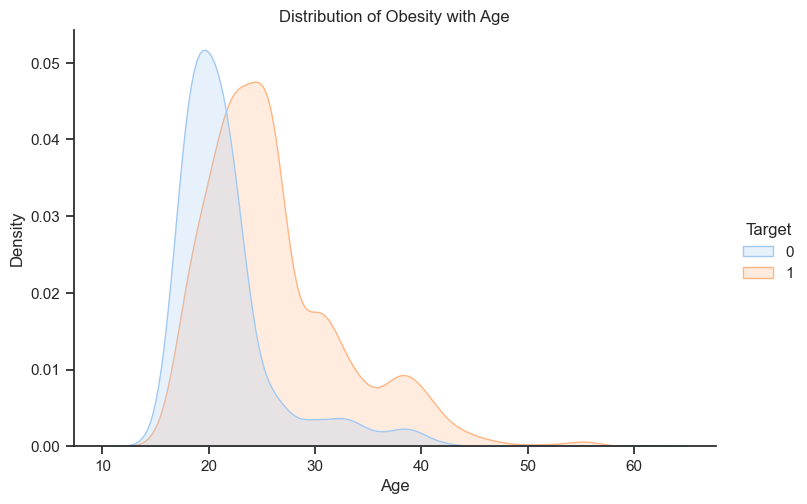

In [6]:
sns.set_style("ticks" , {'axes.grid' : False})
plt.figure(figsize=(7,5))
sns.displot(data = obesity, x = 'Age', hue='Target', kind= 'kde', fill = True, palette= "pastel", height=5, aspect=1.5)
plt.title("Distribution of Obesity with Age")

<Figure size 600x300 with 0 Axes>

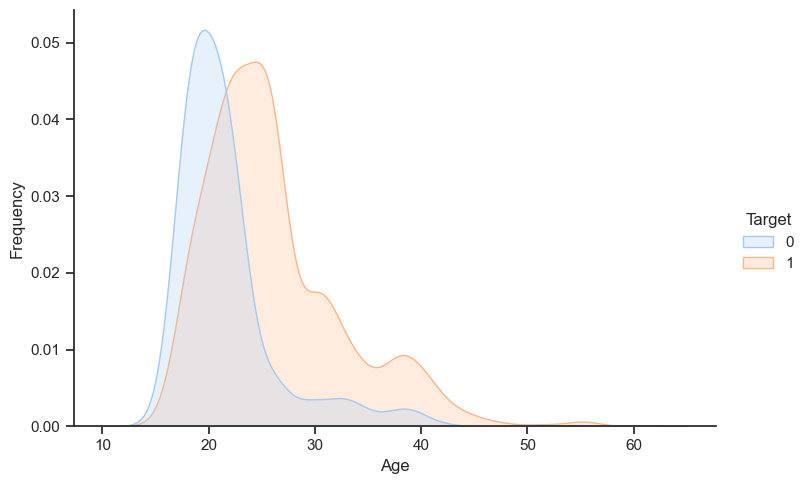

<Figure size 640x480 with 0 Axes>

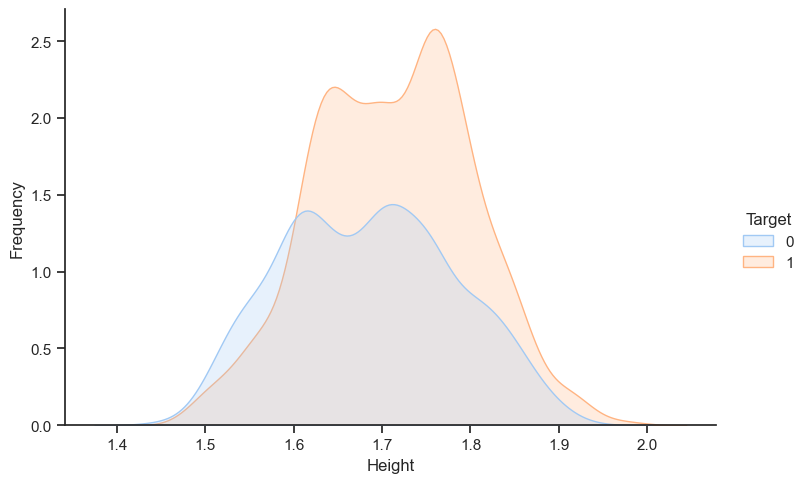

<Figure size 640x480 with 0 Axes>

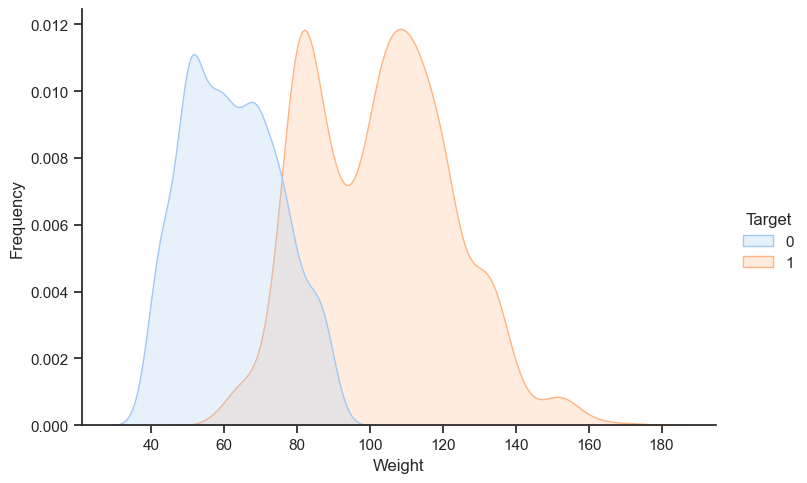

<Figure size 640x480 with 0 Axes>

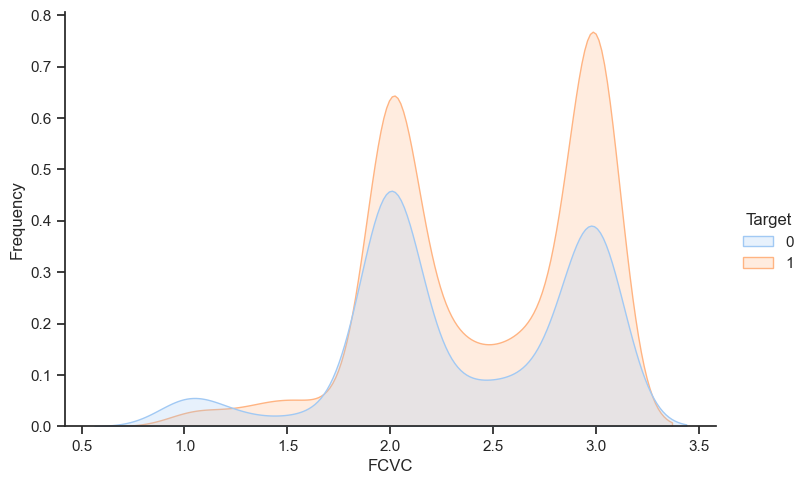

<Figure size 640x480 with 0 Axes>

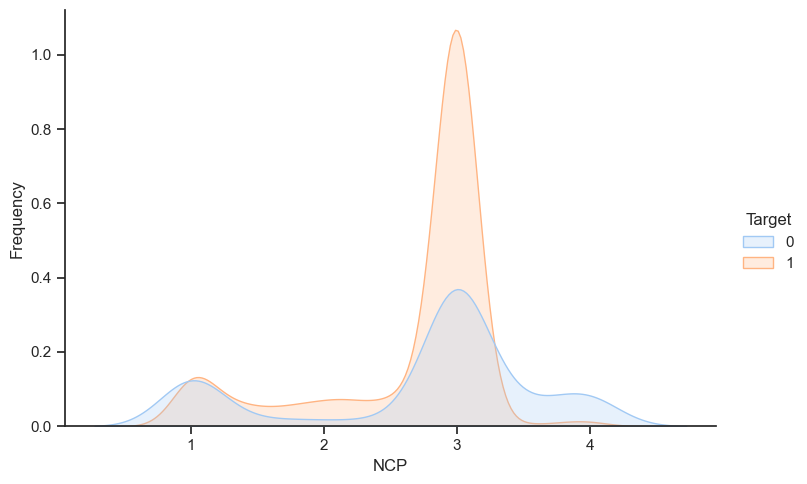

<Figure size 640x480 with 0 Axes>

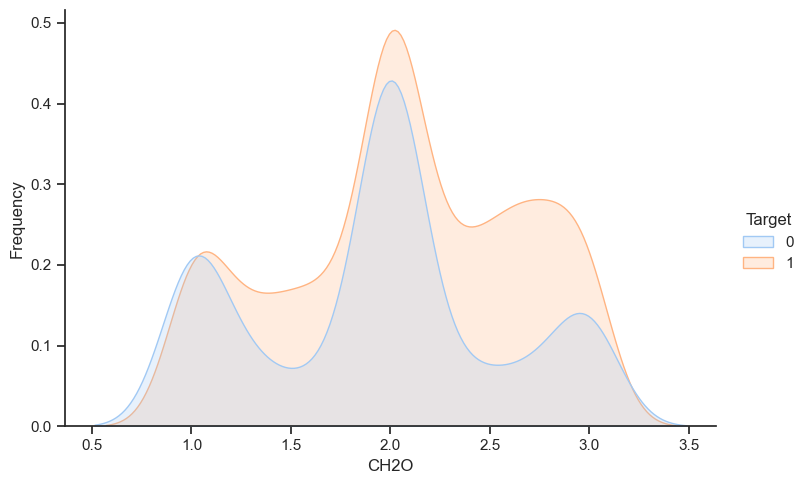

<Figure size 640x480 with 0 Axes>

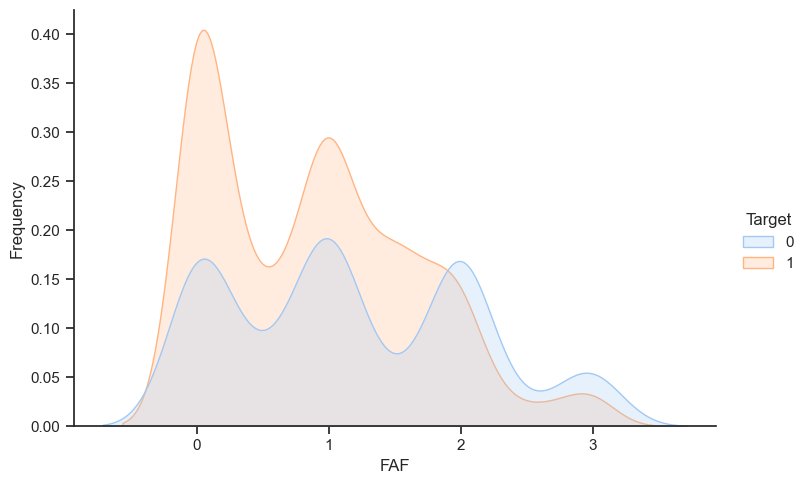

<Figure size 640x480 with 0 Axes>

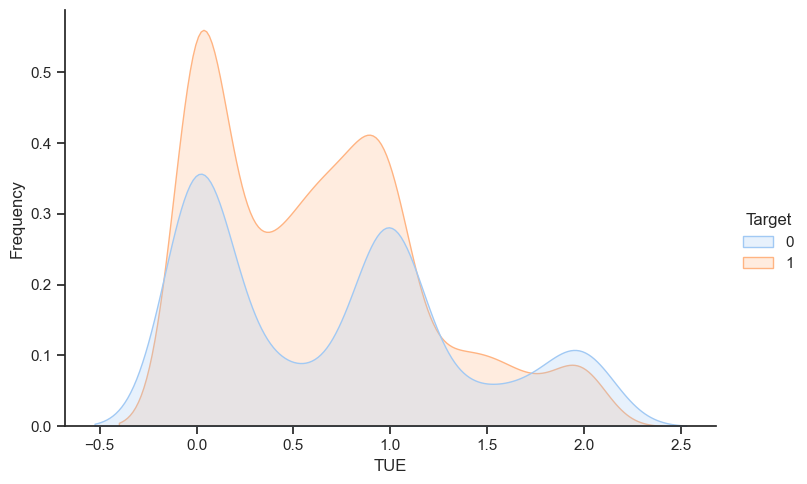

In [7]:
sns.set_style("ticks" , {'axes.grid' : False})
plt.figure(figsize = (6,3))
for col in num_cols:
    plt.tight_layout()
    sns.displot(data = obesity, x = col, hue='Target', kind= 'kde', fill = True, palette= "pastel", height=5, aspect=1.5)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


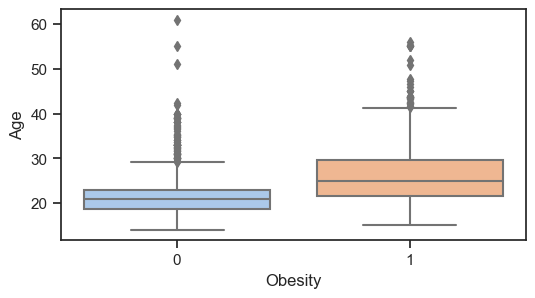

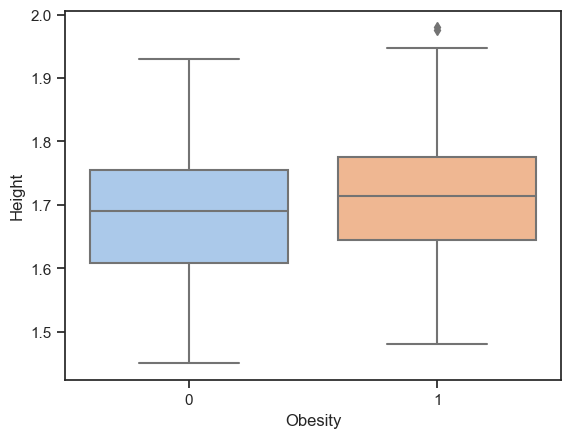

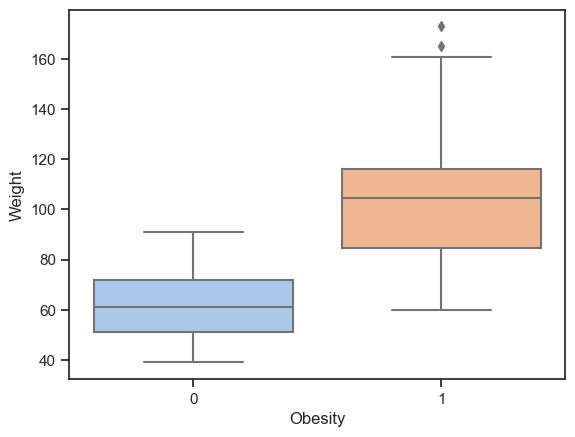

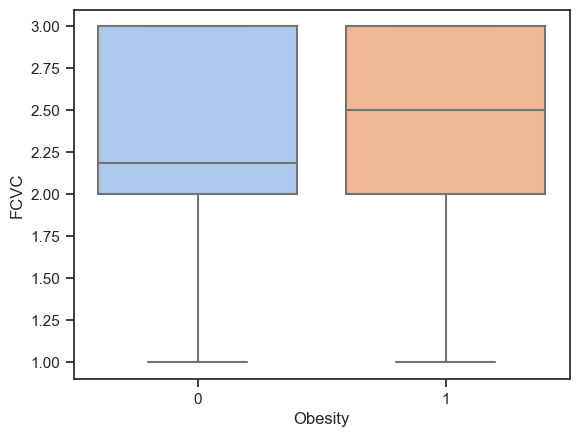

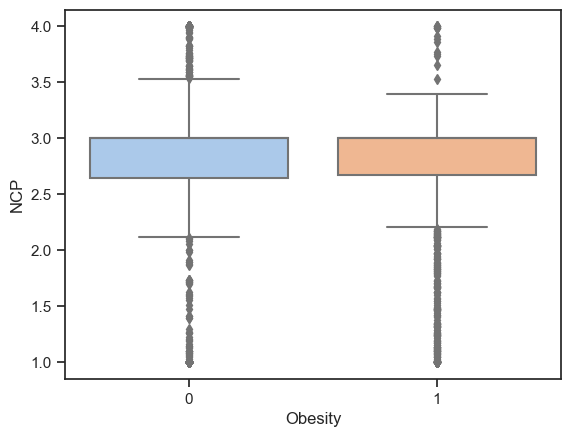

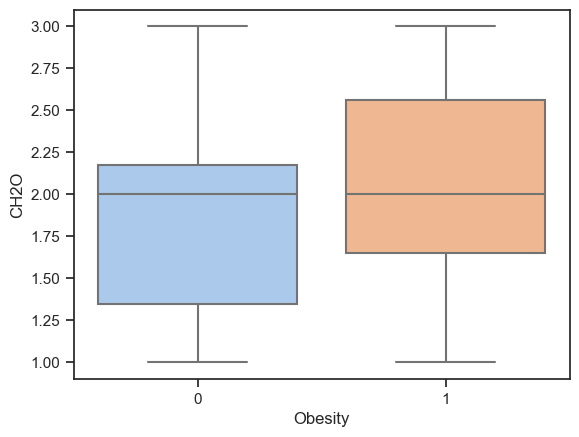

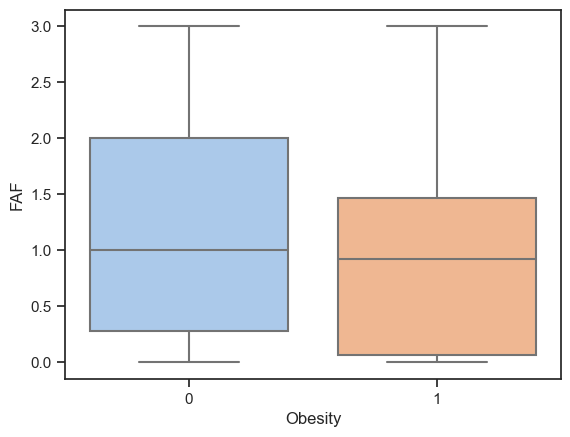

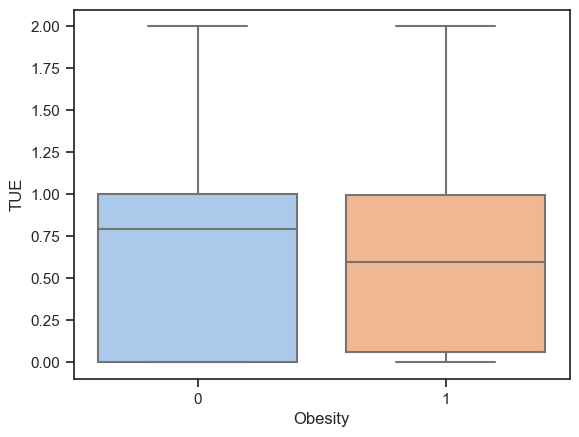

In [8]:
sns.set_style("ticks" , {'axes.grid' : False})
plt.figure(figsize = (6,3))
for col in num_cols:
    plt.tight_layout()
    sns.boxplot(data = obesity, x = 'Target' ,y =  col, palette= "pastel")
    plt.xlabel('Obesity')
    plt.ylabel(col)
    plt.show()

## Train/Test Split of the data set
## One hot encoding and feature scaling 

In [9]:
obesity.isnull().mean().sort_values(ascending= False)
obesity.isnull().sum().sort_values(ascending= False)

Gender        0
SMOKE         0
MTRANS        0
CALC          0
TUE           0
FAF           0
SCC           0
CH2O          0
CAEC          0
Age           0
NCP           0
FCVC          0
FAVC          0
Overweight    0
Weight        0
Height        0
Target        0
dtype: int64

In [29]:
X_train, X_test , y_train, y_test = train_test_split(obesity.iloc[:, : -1]  , obesity.iloc[:, [-1]])
print(X_train.shape)
print(X_test.shape)

(1583, 16)
(528, 16)


In [33]:
# just for visualization on train and test set
train = pd.merge(X_train, y_train, left_index= True, right_index= True)
test = pd.merge(X_test,y_test, left_index= True ,right_index= True)

In [ ]:
# visualization of train set
sns.set_style("ticks" , {'axes.grid' : False})
plt.figure(figsize = (6,3))
for col in num_cols:
    plt.tight_layout()
    sns.displot(data = train, hue = 'Target', x = col, kind= 'kde', fill = True, palette= "pastel", height=5, aspect=1.5)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
# visualization of test set
sns.set_style("ticks" , {'axes.grid' : False})
plt.figure(figsize = (6,3))
for col in num_cols:
    plt.tight_layout()
    sns.displot(data = test, x = col, hue='Target', kind= 'kde', fill = True, palette= "pastel", height=5, aspect=1.5)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# One hot encoding pipeline